## Encoding

Now let us encoding the vocabularies, the idea is simple: remove all the non-starting vowels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df_final = pd.read_csv('./dict_en.yaml', sep = '\t', index_col=0, usecols=[0,1,2], dtype={0:int, 1:str, 2:np.int64} )

In [3]:
df_final.head()

,WORD,COUNT
#RANKING,,
1,in,4501
2,a,4496
3,as,4491
4,it,4486
5,be,4481


In [4]:
word = df_final.WORD.values.astype(str)

compute word-length frequency

(array([6.000e+00, 7.600e+01, 6.280e+02, 2.109e+03, 3.435e+03, 5.127e+03,
        6.105e+03, 6.688e+03, 6.611e+03, 5.488e+03, 4.028e+03, 2.683e+03,
        1.831e+03, 1.005e+03, 5.650e+02, 2.810e+02, 1.400e+02, 4.000e+01,
        3.100e+01, 1.600e+01, 4.000e+00, 2.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]),
 <BarContainer object of 22 artists>)

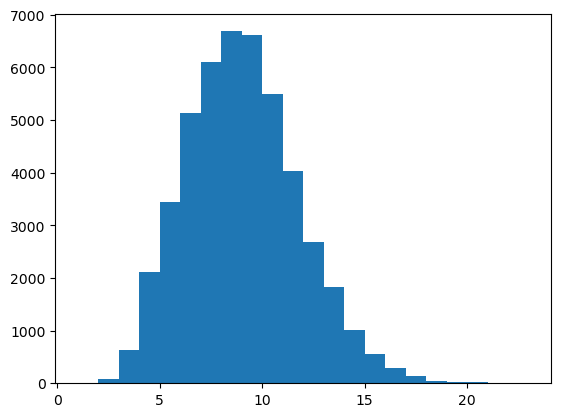

In [5]:
wd_length_freq = list(map(len, word))
plt.hist(np.array(wd_length_freq),bins=range(min(wd_length_freq), max(wd_length_freq)+1,1))

We propose two types of encoding method:
1. encoding word by removing all the non-initial vowel letters, we call it 'abjad'.(abjad refers to a kind of written language without vowels)
2. encoding word by removing the kernel of all its syllables, we call it 'syllabi'.

The first method is morphological, i.e. we focus on the written form while the second method is phonetical hence we need some syllabification tools to help us.

In [6]:
from nltk.tokenize import SyllableTokenizer
from nltk.tokenize import LegalitySyllableTokenizer
from nltk.corpus import words

KeyboardInterrupt: 

In [ ]:
def encoding(word_list, mode='abjad', threshold = 3, **kwargs):
	# remove non-initial, non-final vowel letters
	if mode == 'abjad':
		return _encode_by_abjad(word_list, threshold)
	elif mode == 'syllabi':
		syllabi_mode = kwargs['syllabi_mode']
		return _encode_by_syllabi(word_list, threshold, mode=syllabi_mode)
	return 

def _encode_by_abjad(word_list, threshold):
	encoding_list = []
	vowels = re.compile('[aeiouy]', flags=re.I)
	for word in word_list:
		if len(word) > threshold:
			encoding = word[0] + re.sub(vowels,'', word[1:])
		else:
			encoding = word
		encoding_list.append(encoding)
	return encoding_list

def _encode_by_syllabi(word_list, threshold, mode = 'SSP'):
	encoding_list = []
	if mode == 'SSP':
		tokenizer = SyllableTokenizer()
	elif mode == 'LP':
		tokenizer = LegalitySyllableTokenizer(words.words())

	for word in word_list:
		encoding = '_'.join(tokenizer.tokenize(word))
		encoding_list.append(encoding)
	return encoding_list

In [8]:
SSP_tokenization = encoding(word, 'syllabi', syllabi_mode= 'SSP' )
LP_tokenization = encoding(word, 'syllabi', syllabi_mode= 'LP' )

In [9]:
df_final['SSP_tokenization'] = SSP_tokenization
df_final['LP_tokenization'] = LP_tokenization

In [10]:
df_final[df_final.SSP_tokenization != df_final.LP_tokenization]

,WORD,COUNT,SSP_tokenization,LP_tokenization
#RANKING,,,,
22,other,4396,ot_her,o_ther
24,may,4386,may,m_ay
37,about,4321,a_bout,ab_out
39,said,4311,said,s_aid
45,see,4281,see,s_ee
...,...,...,...,...
76629,heavenwardly,0,hea_ven_war_dly,he_a_ven_ward_ly
76672,obsessivity,0,o_bses_si_vi_ty,ob_ses_si_vi_ty
76688,radiolocate,0,ra_dio_lo_ca_te,ra_di_o_lo_ca_te


In [11]:
df_final[df_final.WORD == 'linguistic']

,WORD,COUNT,SSP_tokenization,LP_tokenization
#RANKING,,,,
4520,linguistic,249,lin_guis_tic,lin_gu_i_stic


In [12]:
len(encoding(word, 'abjad'))

46899

In [13]:
df_final['encoding_abjad'] = encoding(word, 'abjad')

In [33]:
df_final[df_final.WORD.isin(['aggressive','objective','formula','international','nation','schedule','scratch','glimpse','psychological','strong'])]

,WORD,COUNT,SSP_tokenization,LP_tokenization,encoding_abjad
#RANKING,,,,,
260,international,3303,in_ter_na_tio_nal,in_ter_na_ti_o_nal,intrntnl
555,strong,2329,strong,strong,strng
850,nation,1709,na_tion,nat_ion,ntn
1693,schedule,875,sche_du_le,sche_du_le,schdl
1807,objective,812,ob_jec_ti_ve,ob_jec_ti_ve,objctv
2184,formula,654,for_mu_la,for_mu_la,frml
2370,psychological,593,psyc_ho_lo_gi_cal,psy_cho_lo_gi_cal,pschlgcl
4755,aggressive,230,ag_gres_si_ve,ag_gres_si_ve,aggrssv
7932,glimpse,102,glim_pse,glim_pse,glmps


## Encoding Statistics

### abjad

encoding length

In [15]:
def plot_string_length_freq(encoding_series: pd.Series):
	wd_length = list(map(len, encoding_series))
	plt.hist(np.array(wd_length),alpha = 0.5, bins=range(min(wd_length), max(wd_length)+1,1), label=encoding_series.name)
	longest, shortest, average = np.max(wd_length), np.min(wd_length), np.mean(wd_length)
	print('longest length: {}, shortest length: {}, average length: {}'.format(longest, shortest, average))
	return longest, shortest, average

we notice that the encoding length is dramatically reduced. On average cut down 3.3 letters (nearly 34%)

longest length: 15, shortest length: 1, average length: 5.28525128467558
longest length: 23, shortest length: 1, average length: 8.540054158937291


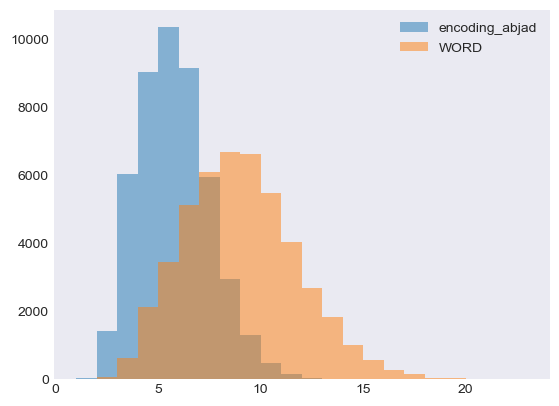

In [16]:
plt.style.use('seaborn-v0_8-dark')
plot_string_length_freq(df_final.encoding_abjad)
plot_string_length_freq(df_final.WORD.astype(str))
plt.legend()

coincident codes: counts of words with same encoding

In [17]:
encoding_counts = df_final.encoding_abjad.value_counts()

coincide encoding rate is 14%

In [18]:
print(np.unique(encoding_counts,return_counts=True))
print(np.unique(encoding_counts,return_counts=True)[1][0]/np.unique(encoding_counts,return_counts=True)[1].sum())

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 20], dtype=int64), array([32205,  3512,   866,   343,   162,   123,    78,    42,    37,
          23,     7,    12,    13,     7,     3,     3,     2,     4,
           1], dtype=int64))
0.8601073631920519


(array([3.2205e+04, 3.5120e+03, 8.6600e+02, 3.4300e+02, 1.6200e+02,
        1.2300e+02, 7.8000e+01, 4.2000e+01, 3.7000e+01, 2.3000e+01,
        7.0000e+00, 1.2000e+01, 1.3000e+01, 7.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 19 artists>)

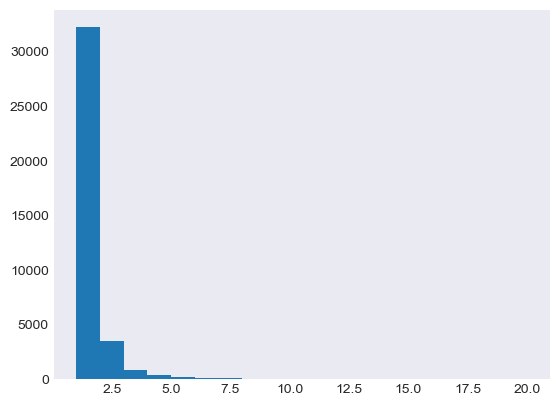

In [19]:
plt.hist(encoding_counts,bins=range(min(encoding_counts), max(encoding_counts)+1,1))

Over 99% encodings has a less than 5 coincide codes

In [20]:
encoding_counts.quantile(0.99)

5.0

There are many ways to reduce the coincide encoding rate, first let's study the coincide encoding length.
We can tolerate coincide codes less than 5

In [21]:
coincident_codes = encoding_counts[encoding_counts > 5].index

longest length: 5, shortest length: 2, average length: 2.895774647887324


(5, 2, 2.895774647887324)

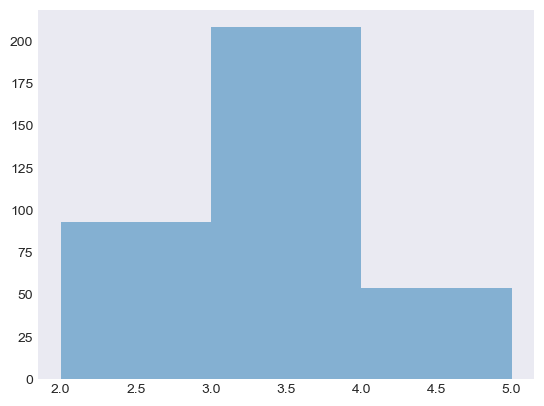

In [22]:
plot_string_length_freq(coincident_codes)

They are between 2 to 5.

length of words that are encoded by coincident codes

longest length: 9, shortest length: 4, average length: 5.07639366827254


(9, 4, 5.07639366827254)

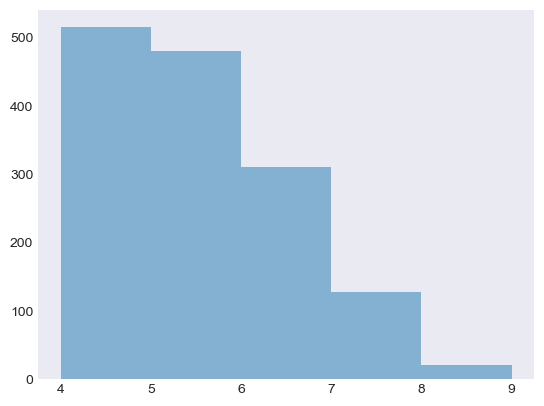

In [23]:
collision_word = df_final[df_final.encoding_abjad.isin(coincident_codes) & df_final.COUNT > 0].WORD
plot_string_length_freq(collision_word)

most of them are short words

Guess: words with single syllable are easy to mix up after 'abjad' encoding

### Syllabi